<a href="https://colab.research.google.com/github/dhanushkaputty/ML/blob/main/ML2(W4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("/content/house_price_train.csv")

In [3]:
data = data.drop(columns=["Alley", "PoolQC", "Fence", "MiscFeature", "FireplaceQu", "Id"])

In [4]:
data = data.dropna()

In [5]:
data_numeric = data.select_dtypes(include=[np.number])

In [6]:
X = data_numeric.drop(columns=["SalePrice"])


In [7]:
y = data_numeric["SalePrice"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = LinearRegression()

In [10]:
model.fit(X_train, y_train)

LinearRegression()

In [11]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

In [12]:
coefficients["Effect_on_SalePrice"] = coefficients["Coefficient"].apply(lambda x: round(x, 2))
coefficients_sorted = coefficients.sort_values(by="Effect_on_SalePrice", ascending=False)

In [13]:
print(coefficients_sorted.head(10))

         Feature   Coefficient  Effect_on_SalePrice
3    OverallQual  23892.856146             23892.86
25    GarageCars  18160.997525             18161.00
16  BsmtFullBath  14554.449832             14554.45
22  TotRmsAbvGrd  13794.230283             13794.23
17  BsmtHalfBath  13630.744724             13630.74
18      FullBath  10173.203198             10173.20
19      HalfBath   6822.243040              6822.24
4    OverallCond   4044.404476              4044.40
23    Fireplaces   2461.222359              2461.22
6   YearRemodAdd    426.428696               426.43


In [14]:
y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [16]:
print("Mean Squared Error:", round(mse, 2))
print("R-squared (R²):", round(r2, 4))

Mean Squared Error: 7545717214.0
R-squared (R²): -0.087


In [17]:
print("Intercept (β₀):", model.intercept_)

Intercept (β₀): -640384.5830309399


In [18]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient (βᵢ)': model.coef_
})

In [19]:
print(coefficients)

          Feature  Coefficient (βᵢ)
0      MSSubClass     -6.545792e+01
1     LotFrontage      2.193222e-01
2         LotArea      4.708052e-01
3     OverallQual      2.389286e+04
4     OverallCond      4.044404e+03
5       YearBuilt     -3.421435e+02
6    YearRemodAdd      4.264287e+02
7      MasVnrArea      4.055531e+01
8      BsmtFinSF1      1.455832e+01
9      BsmtFinSF2      1.729303e+01
10      BsmtUnfSF      1.631106e+00
11    TotalBsmtSF      3.348245e+01
12       1stFlrSF     -3.753376e+00
13       2ndFlrSF      1.418444e+01
14   LowQualFinSF     -1.659828e-10
15      GrLivArea      1.043106e+01
16   BsmtFullBath      1.455445e+04
17   BsmtHalfBath      1.363074e+04
18       FullBath      1.017320e+04
19       HalfBath      6.822243e+03
20   BedroomAbvGr     -9.822446e+03
21   KitchenAbvGr     -4.423453e+04
22   TotRmsAbvGrd      1.379423e+04
23     Fireplaces      2.461222e+03
24    GarageYrBlt      3.114467e+02
25     GarageCars      1.816100e+04
26     GarageArea      8.932

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [22]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [23]:
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))

Mean Absolute Error (MAE): 36884.88
Mean Squared Error (MSE): 7545717214.0
Root Mean Squared Error (RMSE): 86866.09


In [24]:
df = pd.read_csv('/content/ds_salaries.csv')

In [25]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [26]:
df.shape


(3755, 11)

In [27]:
df.dropna()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [29]:
print(df.columns)


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [30]:
X = df[["work_year"]]

In [31]:
y = df["salary_in_usd"]

In [33]:
model = LinearRegression()



In [34]:
model.fit(X, y)


LinearRegression()

In [35]:
print("Intercept:", model.intercept_)

Intercept: -41965376.1288688


In [36]:
print("Slope:", model.coef_[0])

Slope: 20818.57960710659


In [37]:
y_pred = model.predict(X)

In [38]:
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)

In [39]:
print("\nMetrics:")
print("Mean Squared Error (MSE):", round(mse, 2))
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))


Metrics:
Mean Squared Error (MSE): 3767793040.56
Mean Absolute Error (MAE): 47805.25
Root Mean Squared Error (RMSE): 61382.35


In [41]:
import matplotlib.pyplot as plt

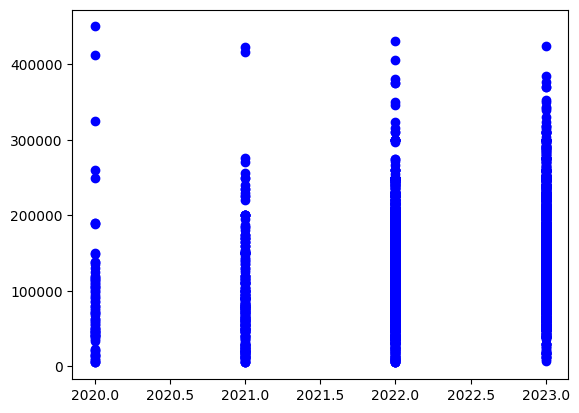

In [42]:
plt.scatter(X, y, color='blue', label='Actual')

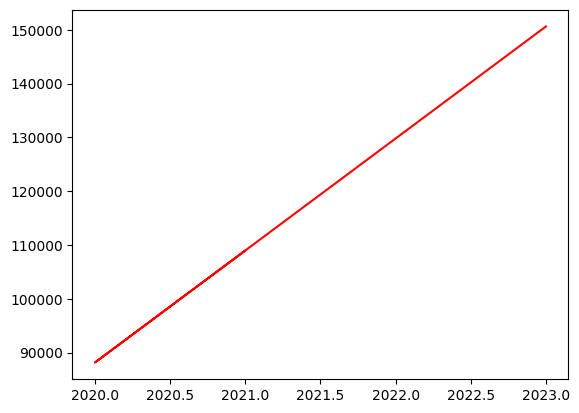

In [43]:
plt.plot(X, y_pred, color='red', label='Predicted')

Text(0.5, 0, 'work_year')

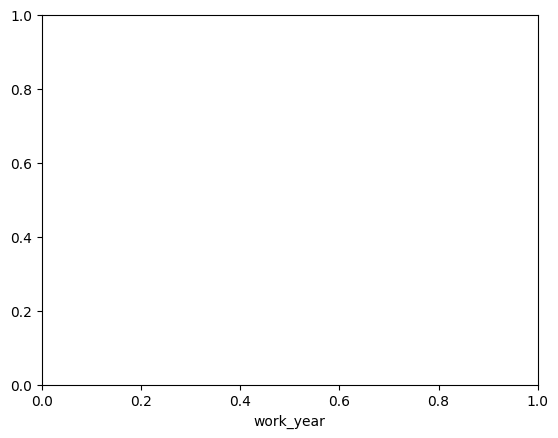

In [45]:
plt.xlabel("work_year")

Text(0, 0.5, 'salary_in_usd')

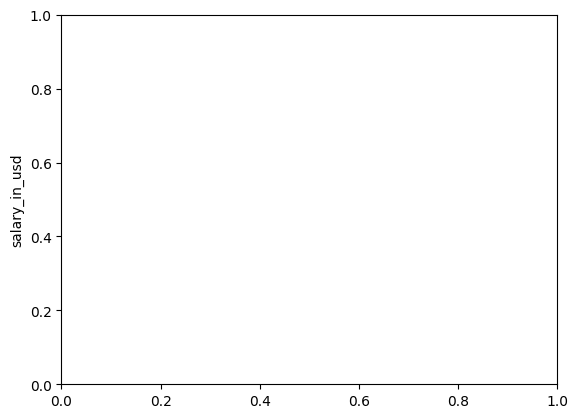

In [46]:
plt.ylabel("salary_in_usd")

Text(0.5, 1.0, 'Salary vs Experience')

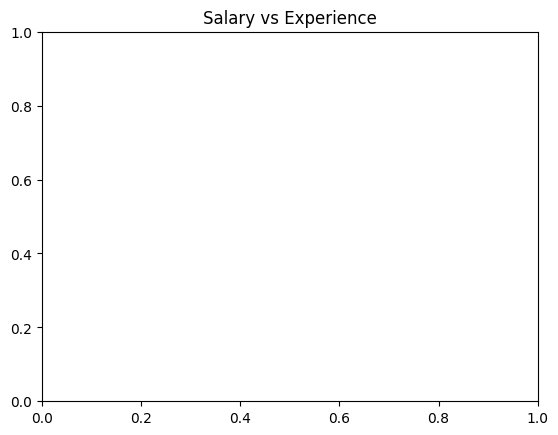

In [47]:
plt.title("Salary vs Experience")


In [48]:
plt.show()

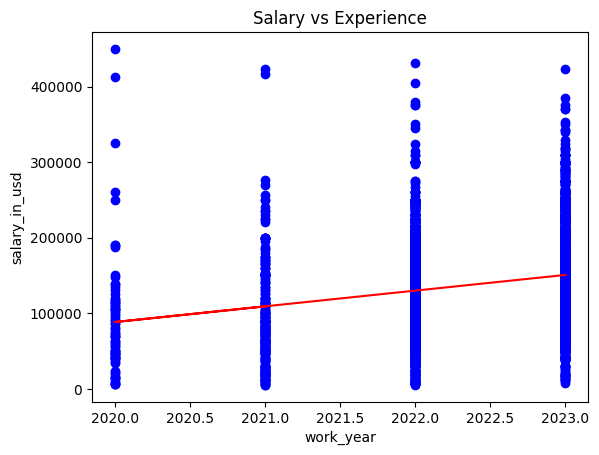

In [49]:
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel("work_year")
plt.ylabel("salary_in_usd")
plt.title("Salary vs Experience")
plt.show()

In [50]:
#3.implement multiple linear regression on houde price and any other dataset(age,height,weight)
df = pd.read_csv('/content/house_price_train.csv')

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [55]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [56]:
df.shape

(1460, 81)

In [60]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [57]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']

In [58]:
target = 'SalePrice'

In [61]:
X = df[features]

In [62]:
y = df[target]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
model = LinearRegression()

In [65]:
model.fit(X_train, y_train)

LinearRegression()

In [67]:
print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.2f}")

Intercept: -94422.1245122955
Coefficients:
OverallQual: 23766.30
GrLivArea: 42.80
GarageCars: 19560.82
TotalBsmtSF: 28.40


In [68]:
y_pred = model.predict(X_test)

In [69]:

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [70]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 25446.0547392125
Mean Squared Error (MSE): 1602914819.443908
Root Mean Squared Error (RMSE): 40036.4186640602


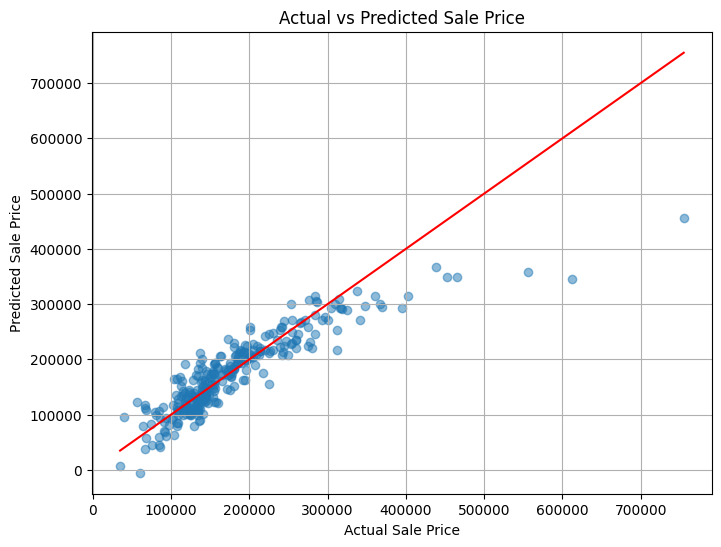

In [71]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # Reference line
plt.grid(True)
plt.show()


In [16]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df1 = pd.read_csv('/content/bmi.csv')

In [4]:
df1.shape

(741, 5)

In [5]:
df1.head()

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.935720,Obese Class 1
1,60,1.71,79.02,27.023700,Overweight
2,60,1.55,74.70,31.092612,Obese Class 1
3,60,1.46,35.90,16.841809,Underweight
4,60,1.58,97.10,38.896010,Obese Class 2


In [6]:
df1

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.935720,Obese Class 1
1,60,1.71,79.02,27.023700,Overweight
2,60,1.55,74.70,31.092612,Obese Class 1
3,60,1.46,35.90,16.841809,Underweight
4,60,1.58,97.10,38.896010,Obese Class 2
...,...,...,...,...,...
736,34,1.86,95.70,27.662157,Overweight
737,44,1.91,106.90,29.302925,Overweight
738,25,1.82,88.40,26.687598,Overweight
739,35,1.88,98.50,27.868945,Overweight


In [9]:
df1.columns

Index(['Age', 'Height', 'Weight', 'Bmi', 'BmiClass'], dtype='object')

In [12]:
X = df1[['Age', 'Height', 'Bmi']]

In [14]:
y = df1['Weight']

In [17]:
model = LinearRegression()

In [18]:
model.fit(X, y)

LinearRegression()

In [19]:
y_pred = model.predict(X)

In [20]:
print("Intercept:", model.intercept_)
print("Coefficients (slopes):", model.coef_)

Intercept: -148.74352644644068
Coefficients (slopes): [-4.61031922e-02  8.68701137e+01  3.03866036e+00]


In [21]:
print("Mean Squared Error (MSE):", mean_squared_error(y, y_pred))
print("R² Score:", r2_score(y, y_pred))

Mean Squared Error (MSE): 21.772352886200533
R² Score: 0.9790439244712468


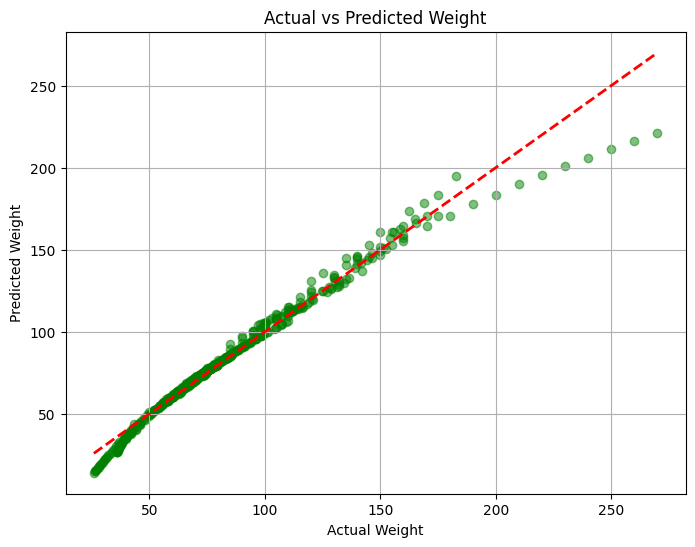

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='green', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted Weight")
plt.grid(True)
plt.show()

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
df = pd.read_csv('/content/ds_salaries.csv')

In [25]:
df.shape

(3755, 11)

In [27]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [28]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [29]:
df_clean = df.drop(['salary', 'salary_currency'], axis=1)


In [34]:
df_encoded = pd.get_dummies(df[['experience_level', 'employment_type', 'job_title', 'company_location']], drop_first=True)



In [35]:
df_encoded['work_year'] = df['work_year']
df_encoded['salary_in_usd'] = df['salary_in_usd']

In [36]:
df_encoded['work_year_squared'] = df_encoded['work_year'] ** 2

In [37]:
X = df_encoded.drop('salary_in_usd', axis=1)
y = df_encoded['salary_in_usd']


In [38]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)


In [41]:
X_poly = poly.fit_transform(X_train[['work_year']])
X_poly_test = poly.transform(X_test[['work_year']])

In [42]:
model = LinearRegression()

In [43]:
model.fit(X_poly, y_train)

LinearRegression()

In [44]:
y_pred = model.predict(X_poly_test)

In [45]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.04708407775870149
MSE: 3761911791.8537817


In [46]:

sorted_idx = X_test['work_year'].argsort()
X_sorted = X_test['work_year'].iloc[sorted_idx]
y_sorted = y_test.iloc[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

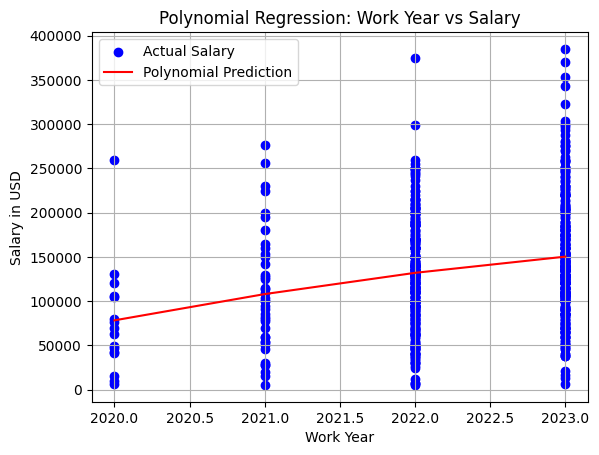

In [47]:
plt.scatter(X_sorted, y_sorted, color='blue', label='Actual Salary')
plt.plot(X_sorted, y_pred_sorted, color='red', label='Polynomial Prediction')
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.title('Polynomial Regression: Work Year vs Salary')
plt.legend()
plt.grid()
plt.show()

In [2]:
#4.Implement Logistic regression on a diabetes dataset.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv('/content/diabetes.csv')


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
((df == 0).sum())

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


In [9]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [10]:
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

In [11]:
df.fillna(df.median(), inplace=True)

In [12]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [13]:
X = df.drop('Outcome', axis=1)

In [14]:
y = df['Outcome']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()

In [17]:
X_train_scaled = scaler.fit_transform(X_train)

In [18]:
X_test_scaled = scaler.transform(X_test)

In [29]:
logreg = LogisticRegression()

In [30]:
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [31]:
y_pred = logreg.predict(X_test_scaled)

In [32]:
acc = accuracy_score(y_test, y_pred)

In [33]:
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.75


In [34]:
cm = confusion_matrix(y_test, y_pred)

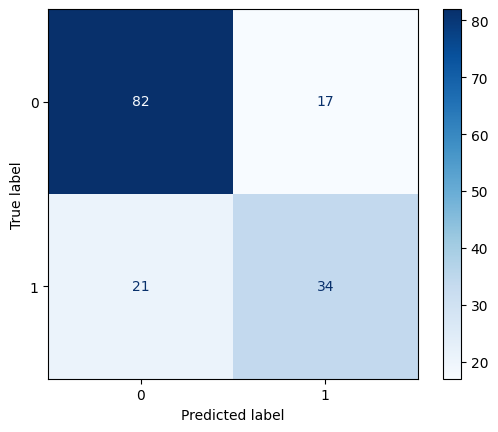

In [35]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_).plot(cmap="Blues")

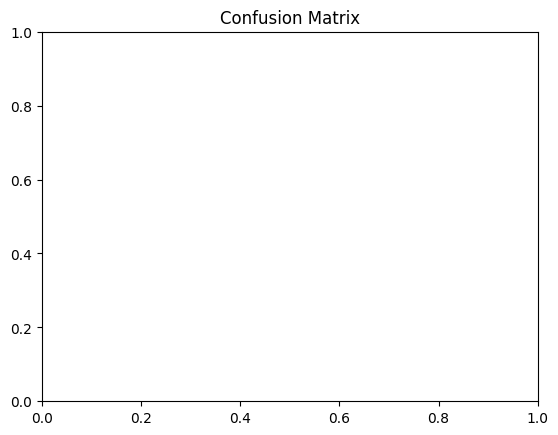

In [36]:
plt.title("Confusion Matrix")
plt.show()

In [37]:
from sklearn.metrics import roc_curve, auc

In [39]:
sns.histplot(y_pred_proba, bins=10, kde=True)
plt.title("Histogram of Predicted Probabilities for Class 1")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()

NameError: name 'y_pred_proba' is not defined

In [40]:
#6. Evaluate the logistic regression model using all the classification metrics and cross check with Formulas(manually using confusion matrix).
df = pd.read_csv('/content/breast-cancer.csv')

In [41]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report


In [43]:
df.drop(columns=['id'], inplace=True)

In [44]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [45]:
X = df.drop(columns=['diagnosis'])

In [46]:
y = df['diagnosis']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
model = LogisticRegression(max_iter=10000)

In [49]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [50]:
y_pred = model.predict(X_test)

In [51]:
cm = confusion_matrix(y_test, y_pred)

In [52]:
tn, fp, fn, tp = cm.ravel()

In [53]:
print("Confusion Matrix:")
print(cm)
print(f"TP = {tp}, TN = {tn}, FP = {fp}, FN = {fn}")

Confusion Matrix:
[[70  1]
 [ 4 39]]
TP = 39, TN = 70, FP = 1, FN = 4


In [54]:
accuracy = (tp + tn) / (tp + tn + fp + fn)

In [55]:
precision = tp / (tp + fp)

In [56]:
recall = tp / (tp + fn)

In [57]:
f1 = 2 * (precision * recall) / (precision + recall)

In [58]:
print(f"Manual Accuracy:  {accuracy:.4f}")
print(f"Manual Precision: {precision:.4f}")
print(f"Manual Recall:    {recall:.4f}")
print(f"Manual F1 Score:  {f1:.4f}")

Manual Accuracy:  0.9561
Manual Precision: 0.9750
Manual Recall:    0.9070
Manual F1 Score:  0.9398


In [59]:
print(f"Sklearn Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Sklearn Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Sklearn Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"Sklearn F1 Score:  {f1_score(y_test, y_pred):.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Sklearn Accuracy:  0.9561
Sklearn Precision: 0.9750
Sklearn Recall:    0.9070
Sklearn F1 Score:  0.9398

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

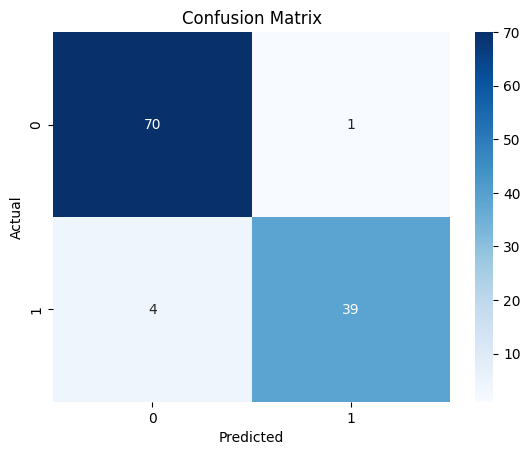

In [61]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Write a program that applies the PCA technique to any dataset
#(a) Standardize the variables in the dataset. Why is this step necessary before performing a PCA?
#(b) Create a scatter plot from the transformed data, with PC1 and PC2 as the axes.
#(c) Which variables are the most important for PC1 and PC2? Why?
#(d) What percentage of the variance in the dataset is explained by PC1 and PC2?
#(e) How many PCs are able to explain more than 80% of the total variance within the data set?

In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('/content/breast-cancer.csv')

In [64]:
df.drop(columns=['id'], inplace=True)

In [65]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [66]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [67]:
#a
scaler = StandardScaler()

In [68]:
X_scaled = scaler.fit_transform(X)

In [69]:
print("✅ (a) Standardization done. This step is necessary to give all features equal importance before PCA.")

✅ (a) Standardization done. This step is necessary to give all features equal importance before PCA.


In [70]:
#b
pca = PCA()

In [71]:
X_pca = pca.fit_transform(X_scaled)

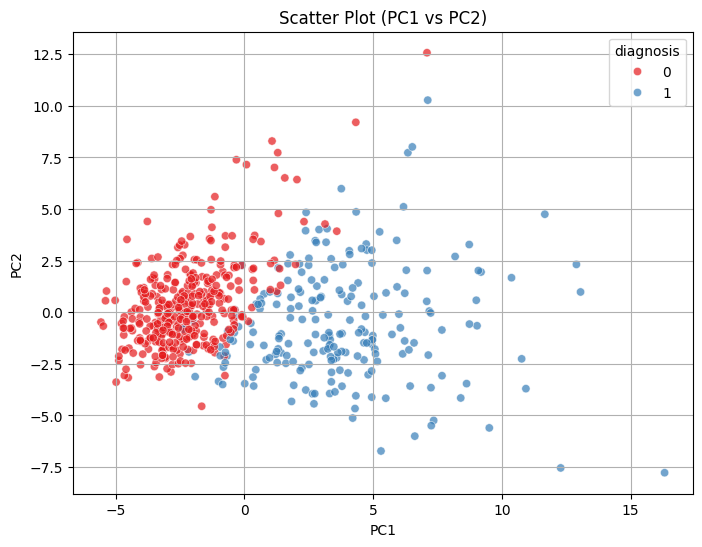

In [72]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter Plot (PC1 vs PC2)")
plt.grid(True)
plt.show()

In [73]:
#c
pc1_loadings = pd.Series(pca.components_[0], index=X.columns)

In [74]:
pc2_loadings = pd.Series(pca.components_[1], index=X.columns)

In [75]:
print(pc1_loadings.abs().sort_values(ascending=False).head())

concave points_mean     0.260854
concavity_mean          0.258400
concave points_worst    0.250886
compactness_mean        0.239285
perimeter_worst         0.236640
dtype: float64


In [76]:
print(pc2_loadings.abs().sort_values(ascending=False).head())

fractal_dimension_mean     0.366575
fractal_dimension_se       0.280092
fractal_dimension_worst    0.275339
radius_mean                0.233857
compactness_se             0.232716
dtype: float64


In [77]:
#d
explained_var = pca.explained_variance_ratio_

In [78]:
pc1_pc2_var = explained_var[0] + explained_var[1]

In [80]:
print(f"\n (d) PC1 explains {explained_var[0]*100:.2f}% variance.")
print(f"PC2 explains {explained_var[1]*100:.2f}% variance.")
print(f"Together, PC1 and PC2 explain {pc1_pc2_var*100:.2f}% of the total variance.")


 (d) PC1 explains 44.27% variance.
PC2 explains 18.97% variance.
Together, PC1 and PC2 explain 63.24% of the total variance.


In [81]:
#e
cum_var = np.cumsum(explained_var)

In [82]:
num_pcs_80 = np.argmax(cum_var >= 0.80) + 1

In [84]:
print( {num_pcs_80})

{np.int64(5)}


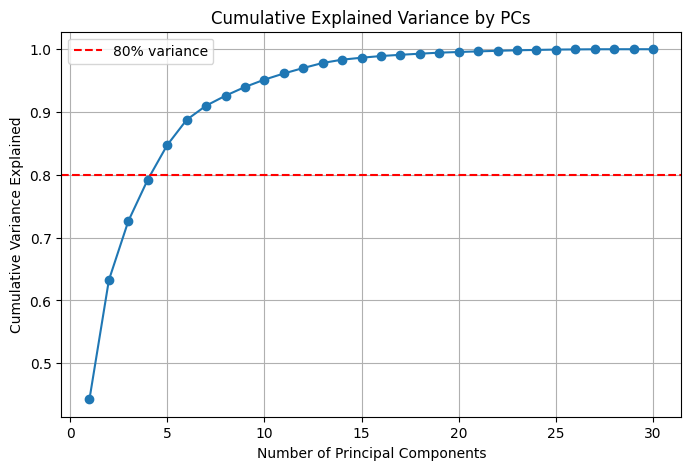

In [85]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% variance')
plt.title("Cumulative Explained Variance by PCs")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.legend()
plt.grid(True)
plt.show()